#### 추측통계

In [93]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [94]:
# 모집단과 표본
# 통계량을 통해서 모수를 추측하는 것
# 모수를 통해 모집단을 설명하는 것이 목적이다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

choice함수의 특징
- 뽑을때마다 다르게 나옴, 중복 허용!
- 만약에 중복허용이 싫으면 replace=False 설정!

In [95]:
np.random.choice([1,2,3],3,replace=False) # 중복방지

array([2, 1, 3])

In [96]:
data= np.array([1,2,3,4,5])
p = [0.1, 0.2, 0.4, 0.2, 0.1]
sample = np.random.choice(data,size=10,replace=True, p=p) # p는 선택될 확률을 지정
print(sample)

[3 4 1 3 4 5 3 2 4 4]


In [97]:
np.random.seed(0)
sample = np.random.choice(scores,20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [98]:
sample.mean()

70.4

In [99]:
scores.mean() 
# 모집단의 평균과 표본의 평균은 다르다.
# 그것이 최선이니까... 표본의 평균을 가지고 모집단의 평균을 추정.
# 여기서 확률의 개념이 나와용

69.53

In [100]:
# 샘플 여러 개 뽑아보자
# 샘플 size는 20개, 샘플은 5개
for i in range(5):
    sample = np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



#### 왜 확률을 공부해야하는가?
- 
모집단의 (확률)분포가 정규분포를 따른다고 하면 표본도 정규분포를 따르므로 모수추정이 쉬워진다.

In [101]:
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21] # 확률이 왜곡된 주사위로 가정

np.random.choice(dice,p=prob) # prob의 확률로 dice를 뽑아라.
# -> 6많이나옴! (확률이 제일 높으니까)

1

In [102]:
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21] # 확률이 왜곡된 주사위로 가정

np.random.seed(1)
num_trial=100
sample = np.random.choice(dice,num_trial,p=prob) # 순서 바뀌면 결과 안 나옴
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [103]:
freq,_ = np.histogram(sample,bins=6,range=(1,7))

print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq,
                   'relative_frequency':freq/num_trial},
                   index=pd.Index(np.arange(1,7),name='dice'))

rdf

[ 6 12 12 20 24 26] 



,frequency,relative_frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


index = pd.Index(np.arange(1,7),name='dice')는 pd.DataFrame 객체를 생성할 때, 인덱스(index)를 설정하는 코드입니다.

np.arange(1,7)는 1부터 6까지의 정수 배열을 생성합니다. 이 배열은 주사위의 면을 나타냅니다.

pd.Index() 함수는 배열을 pd.Index 객체로 변환합니다. 이때 name 매개변수를 사용하여 인덱스의 이름을 설정할 수 있습니다. 따라서, pd.Index(np.arange(1,7),name='dice')는 이름이 'dice'인 인덱스를 생성합니다. 이 인덱스는 주사위의 면을 나타내며, 1부터 6까지의 값을 갖습니다.

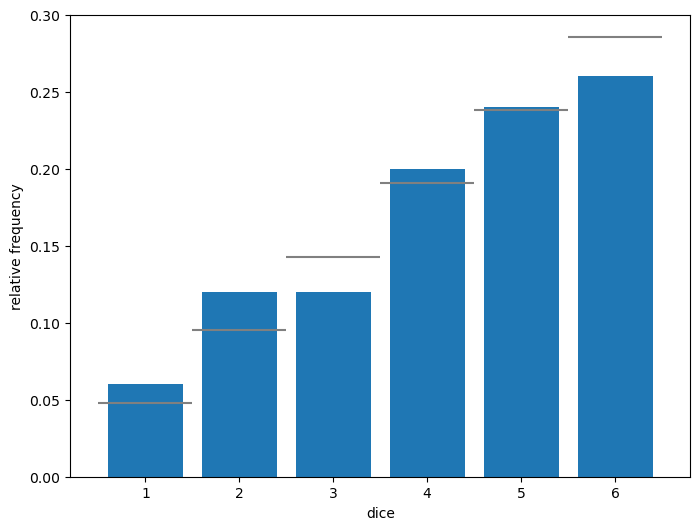

In [104]:
np.linspace(1.5,6.5,6)  #각 구간의 눈금표시 
np.random.seed(1)
num_trial=100
sample = np.random.choice(dice,num_trial,p=prob)

fig=plt.figure(figsize=(8,6))
plt.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray') 
plt.xticks(np.linspace(1.5,6.5,6), np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()
# 회색 바는 hlines로, 1-2, 2-3 ... 7-8까지.
# 1.5자리에 1이라는 라벨을 붙인다.

ㄴ> plt.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8) 해석

plt.hist() 함수는 히스토그램을 그리는 함수입니다. 함수의 인자로는 데이터를 나타내는 변수명(sample), 구간의 개수(bins), 범위(range), 밀도(density), 상대폭(rwidth) 등이 설정됩니다.

sample: 히스토그램을 그리기 위한 데이터 샘플입니다.
bins: 히스토그램에서 사용할 구간의 개수입니다. 위 코드에서는 6으로 설정되어 있으므로, 주사위 눈금의 개수인 6개의 구간으로 히스토그램이 그려집니다.
range: 히스토그램에서 사용할 데이터의 범위를 설정합니다. 위 코드에서는 (1, 7)으로 설정되어 있으므로, 주사위 눈금 값은 1에서 6까지의 범위에서 선택됩니다.
density: 히스토그램에서 밀도를 나타낼지 여부를 설정합니다. True로 설정되어 있으므로, 히스토그램의 막대의 높이가 상대도수를 나타냅니다.
rwidth: 히스토그램에서 막대의 너비를 상대적인 값으로 설정합니다. 위 코드에서는 0.5로 설정되어 있습니다.
이를 통해 sample 데이터의 분포를 1에서 6까지의 6개 구간으로 나눈 후, 각 구간의 상대도수를 계산하여 히스토그램으로 시각화합니다.

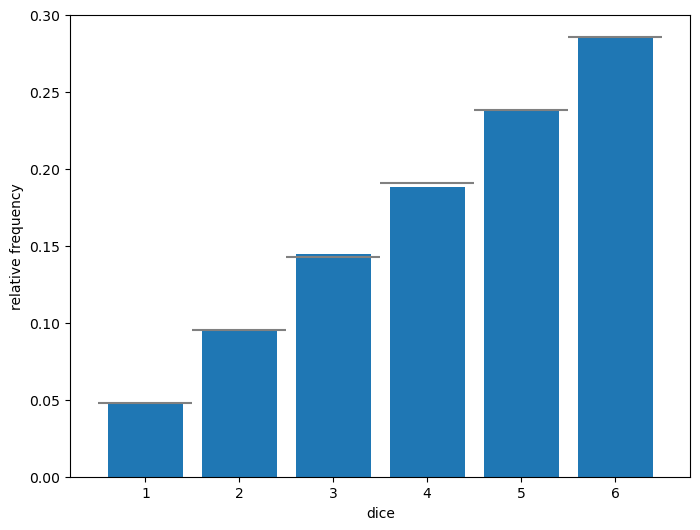

In [105]:
# 샘플 수가 많아지면 정확도가 올라간다.
# 1000000번 시행하여 얻은 눈의 상대도수로부터 어쩌고 저쩌고 마저적기
np.linspace(1.5,6.5,6) 
np.random.seed(1)
num_trial=100000
sample = np.random.choice(dice,num_trial,p=prob)

fig=plt.figure(figsize=(8,6))
plt.hist(sample,bins=6,range=(1,7),density=True,rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray') 
plt.xticks(np.linspace(1.5,6.5,6), np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()


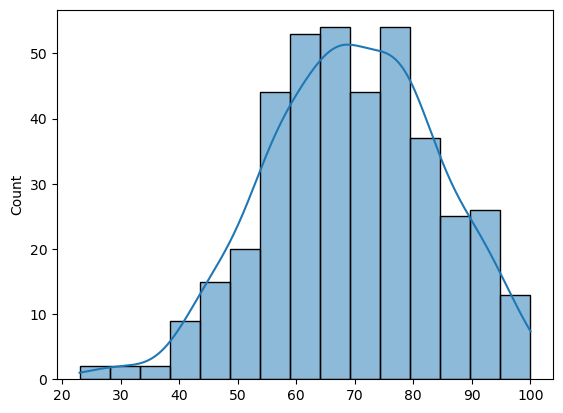

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()

In [107]:
scores.shape

(400,)

Text(0, 0.5, 'relative frequency')

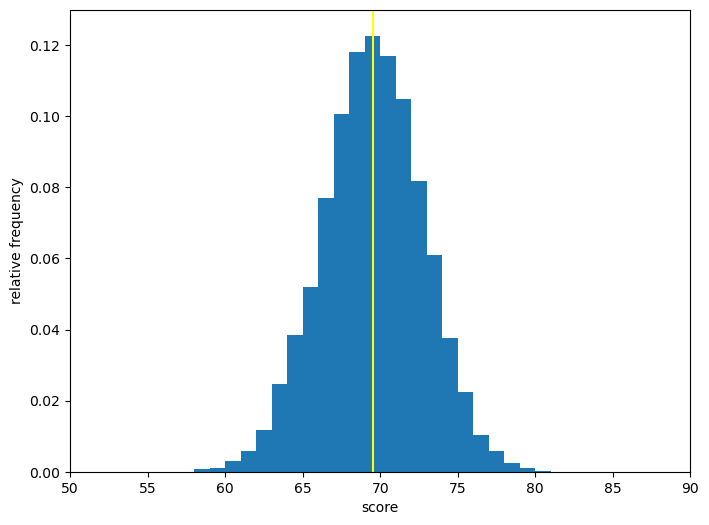

In [108]:
# 표본의 평균이 어떤 분포를 이루는가? for문 사용
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)] 
# 20개 뽑는 실험 만 번 실행

len(sample_means) # 10000

# 표본평균이 어떤 분포를 이루는지?

fig = plt.figure(figsize=(8,6))
plt.hist(sample_means, bins=100, range=(0,100), density=True)
# plt.show()
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores),0,1,'yellow')
plt.axis([50,90,0,0.13]) # x축은 50-90, y축은 0에서 0.13
plt.xlabel('score')
plt.ylabel('relative frequency')

# ==> 표본평균은 모평균을 기준으로 정규분포를 이루고있다.!!
# 결론) 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다.

plt.vlines 함수는 수직선을 그리는 함수입니다. 이 함수의 첫 번째 인자는 수직선의 위치를 나타내며, 두 번째 인자와 세 번째 인자는 수직선의 시작점과 끝점의 y값을 나타냅니다. 세 번째 인자인 'yellow'는 수직선의 색상을 지정합니다.

따라서 plt.vlines(np.mean(scores),0,1,'yellow')는 평균값(np.mean(scores))을 위치로 하고, y값이 0부터 1까지인 노란색 수직선을 그리는 코드입니다. 0은 수직선의 시작점의 y값이고, 1은 끝점의 y값을 나타냅니다. 이 경우 y값이 0부터 1까지인 이유는 density=True로 설정하여 상대도수를 히스토그램의 높이로 표시했기 때문입니다.

fig 변수는 그래프를 그릴 도화지(Figure)를 생성하기 위해 사용되는 변수입니다. plt.figure 함수를 사용하여 도화지를 생성하고, 그 도화지에 그래프를 그리기 위해 fig 변수가 사용됩니다.

따라서, fig 변수를 사용하지 않고 그래프를 그리는 것도 가능하지만, 그래프의 크기나 레이아웃 등을 조정하기 위해서는 fig 변수를 사용하는 것이 더 편리합니다.

그러나, fig 변수가 반드시 필요한 것은 아니며, plt.hist 함수만 사용하여 그래프를 그릴 수도 있습니다. 
하지만, 이렇게 그래프를 그릴 경우 그래프의 크기나 레이아웃 등을 조정하기 어려울 수 있습니다. 따라서, 그래프를 그릴 때는 fig 변수를 사용하는 것이 보다 유용합니다.

axis와 axes는 비슷한 용어로 보일 수 있지만, 서로 다른 개념입니다.

axis는 그래프의 좌표축을 설정하고 제어하는 함수입니다. axis 함수는 현재 그림의 x축 범위, y축 범위, 눈금 간격 등을 설정하거나, 축의 스케일을 변경하거나, 축의 범위를 자동으로 조절하는 등의 다양한 기능을 제공합니다.

axes는 그래프의 좌표계 자체를 의미합니다. axes 함수는 새로운 subplot을 만들거나, 그래프의 위치와 크기를 조절하고, 그래프의 타이틀과 레이블 등을 설정하는 등의 기능을 제공합니다. axes 함수는 axis 함수와는 달리 하나의 subplot에 대한 설정을 담당합니다.

예를 들어, plt.subplots()는 새로운 axes 객체를 생성하고, ax.set_xlabel()과 ax.set_ylabel()와 같은 메서드를 사용하여 axis를 설정할 수 있습니다. 이렇게 생성된 axes 객체는 plot() 함수와 같은 다른 함수에 전달하여 데이터를 그래프로 그릴 수 있습니다.

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.

확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다. 이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 샘플 크기가 커질수록 이론적인 확률 값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하에 데이터를 수집하고, 그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.

- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며, 이론적인 확률값에 근접하도록 데이터 크기를 늘립니다. 반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다. 빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을 어떤 사건이 일어날 가능성으로 이해합니다. 이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다. 예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연어 처리 분야 등에서 사용됩니다.

빈도주의 관점은 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다. 이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.

- 100번의 실험을 수행해서 앞면이 60번 나왔다면, 앞면이 나올 확률은 0.6, 즉 60%입니다. 이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.

- 이와 같은 방법으로, 빈도주의 관점은 대규모 데이터를 바탕으로 통계적 추론을 수행하는 분야에서 많이 사용됩니다. 예를 들어, 의학 연구에서는 수많은 환자 데이터를 바탕으로 질병 발생 확률을 계산하고, 이를 바탕으로 예방 방법을 제시합니다. 또한, 마케팅 연구에서는 대규모 데이터를 바탕으로 소비자의 구매 확률을 계산하고, 이를 바탕으로 마케팅 전략을 수립합니다.

- 즉, 빈도주의 관점에서는 반복적인 실험을 통해 데이터를 모으고, 이를 바탕으로 확률을 계산합니다. 이를 통해 대규모 데이터에서 일어날 가능성을 추정하고, 이를 바탕으로 데이터 분석 및 예측을 수행합니다.

베이지안 관점은 확률을 "사건이 일어날 가능성"으로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 암 환자 진단 문제를 생각해봅시다. 어떤 환자가 암에 걸렸을 때, 병원에서 검사를 통해 양성 판정이 나왔다고 가정해봅시다. 이 때, 베이지안 관점에서는 이 결과가 실제로 환자가 암에 걸렸음을 의미하는가에 대한 확률을 계산합니다.

- 베이지안 관점에서는 이 확률을 "사전 확률"이라고 부릅니다. 즉, 검사를 통해 양성 판정이 나오기 전에는 이 환자가 암에 걸렸을 확률을 이미 가정하고 있었다는 것입니다. 예를 들어, 이전의 암 환자들의 데이터를 분석하여, 이 환자가 암에 걸렸을 확률을 0.1, 즉 10%로 가정하였다고 합시다.

- 그리고, 이제 검사를 통해 양성 판정이 나왔다고 가정합니다. 이 때, 검사 결과가 양성일 때 암에 걸렸을 확률을 계산하는 것이 베이지안 관점입니다. 이를 "사후 확률"이라고 부르며, 사전 확률과 검사 결과를 고려하여 계산됩니다.

- 예를 들어, 이전의 암 환자들의 데이터에서 암에 걸린 환자 중 80%가 양성 판정을 받았다고 가정합니다. 이러한 정보를 바탕으로, 이 환자가 암에 걸렸을 사후 확률은 다음과 같이 계산됩니다.

사전 확률: 10%
우도(검사 결과가 양성일 확률): 80%
사후 확률: (10% x 80%) / (10% x 80% + 90% x 20%) = 30.8%

즉, 이 환자가 검사 결과가 양성인 경우에는 암에 걸렸을 확률이 30.8%입니다.

예를 들어, 여러분이 복권을 사서 당첨이 되었다고 가정해봅시다. 그리고 당첨된 복권의 확률을 계산하고자 합니다. 이 때, 베이지안 관점에서는 이 확률을 "사후 확률"로 계산합니다.

- 우선, 이 복권의 당첨 확률을 사전 지식으로 가정합니다. 예를 들어, 이 복권이 얼마나 팔렸는지, 이전의 당첨 데이터는 어떻게 되는지 등의 정보를 바탕으로, 사전 확률을 0.001, 즉 0.1%로 가정합니다.

- 그리고, 복권을 구매한 사람들 중에서 몇 명이 당첨되었는지 데이터를 수집합니다. 이를 바탕으로 우도, 즉 "당첨된 복권을 구매한 사람들의 비율"을 계산합니다.

- 예를 들어, 1,000,000 명이 복권을 구매하고, 그 중 1,000 명이 당첨되었다면, 우도는 0.001, 즉 0.1%입니다.

- 그리고, 이 사전 확률과 우도를 결합하여 사후 확률을 계산합니다. 이를 통해, 이 복권을 구매했을 때 당첨될 확률을 추정할 수 있습니다.


이와 같이, 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다. 이를 통해 데이터의 불확실성을 고려하여 예측과 의사결정을 수행합니다.

#### 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1) / 불편분산 사용하는 경우는 표본을 뽑았을 때에만 사용한다.
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [35]:
# 평균 4, 표준편차 0.8인 정규분포에서 10개의 샘플추츌

from scipy import stats
population = stats.norm(loc=4, scale=0.8)
population # 객체(정규분포)

population.rvs(size=10) #샘플사이즈가 10개인 샘플.
print(type(population))

<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>


해당 코드는 SciPy의 stats 서브패키지에서 norm 클래스를 가져와 population 변수에 저장합니다. norm 클래스는 정규분포를 나타내는 클래스로, loc과 scale 매개변수를 사용하여 평균과 표준편차를 지정할 수 있습니다. 따라서 loc=4와 scale=0.8을 지정하여 평균이 4이고 표준편차가 0.8인 정규분포를 population으로 생성합니다. 이렇게 생성된 population 객체는 확률밀도함수(PDF), 누적분포함수(CDF), 분위수(quantile) 등을 계산할 수 있는 다양한 메서드를 제공합니다.

rvs는 random variates의 약어로, 분포로부터 임의의 난수(random variates)를 생성하는 메소드입니다.

Q.
from scipy import stats
population = stats.norm(loc=4, scale=0.8)
population.rvs(10) 
위 코드랑
np.random.normal(4,0.8,10) 이 코드는 같은거야?

--> from scipy import stats를 이용하여 stats.norm으로 정규분포를 생성한 후, rvs() 함수를 사용하여 이 분포에서 10개의 랜덤 샘플을 추출하는 코드와, np.random.normal(4, 0.8, 10)으로 정규분포를 생성한 후, 10개의 랜덤 샘플을 추출하는 코드는 비슷한 결과를 생성하지만, 약간의 차이가 있습니다.

stats.norm(loc=4, scale=0.8)은 평균(mean)이 4이고 표준편차(standard deviation)가 0.8인 정규분포 객체를 생성합니다. rvs() 함수를 사용하여 이 분포에서 10개의 랜덤 샘플을 추출하면, 매번 다른 값을 생성합니다.

np.random.normal(4, 0.8, 10)은 평균(mean)이 4이고 표준편차(standard deviation)가 0.8인 정규분포에서 10개의 랜덤 샘플을 추출합니다. 이 함수는 매번 같은 값이 생성됩니다.

따라서, rvs() 함수를 사용하는 경우에는 매번 다른 값이 생성되므로, 실험을 반복하거나 샘플링을 다시 수행할 때마다 다른 결과를 얻을 수 있습니다. np.random.normal() 함수를 사용하는 경우에는 매번 같은 값이 생성되므로, 실험을 반복하거나 샘플링을 다시 수행해도 항상 같은 결과를 얻습니다.

In [110]:
# 표본평균으로 이루어진 배열
# 샘플사이즈가 10인 표본 10000개
sample_mean_array = np.zeros(10000) #0으로 채워진 배열 먼저 만든 후 집어넣기
print(sample_mean_array)
for i in range(10000):
    sample_mean_array[i] = population.rvs(size=10).mean() #인덱스 i
    
sample_mean_array[:10] #

[0. 0. 0. ... 0. 0. 0.]


array([4.16229932, 4.30950951, 4.15269761, 3.67346406, 3.98826747,
       4.03264391, 4.01680985, 4.03245649, 3.84053875, 3.60664811])

In [111]:
# 표본평균의 평균
sample_mean_array.mean().round(2)

4.0

In [112]:
# 표본평균의 표준편차
sample_mean_array.std(ddof=1).round(2)

0.25

ddof 인수는 기본값이 0으로 지정되어 있습니다. 즉, sample_mean_array.std()와 같이 ddof 인수를 생략하면 자유도를 보정하지 않고 모집단 표준편차를 계산하려고 하기 때문에, 표본 표준편차를 계산할 때는 반드시 ddof=1과 같이 지정해야 합니다.

만약 ddof=0으로 지정하면, 분모에 (n - ddof) 대신 n이 사용되기 때문에, 보통 표본 표준편차 공식과는 다른 값이 계산됩니다. 따라서, ddof 인수를 생략하거나 ddof=0으로 지정하면, 오류가 아닌 부정확한 결과가 출력될 가능성이 있습니다.

<AxesSubplot:ylabel='Count'>

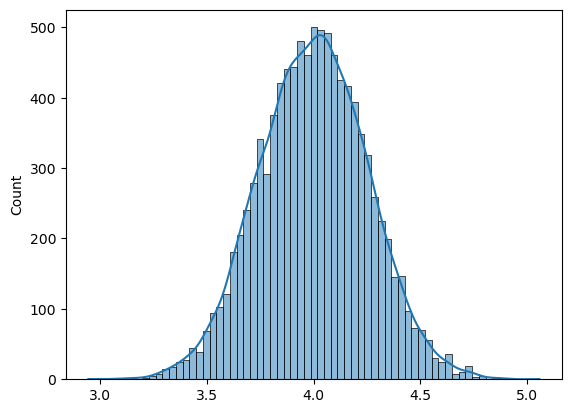

In [113]:
sns.histplot(sample_mean_array,kde=True)

In [114]:
# 샘플 사이즈 변화 10,110,210,...,100000까지
size_array = np.arange(10,100100,100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [115]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [116]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션 -> 사이즈 키울수록 모평균에 근사하다.
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[990:]

array([3.99954467, 4.00115947, 4.00311652, 3.99975072, 3.99989178,
       3.99777706, 3.99881193, 3.99936965, 3.99778023, 3.99851887,
       3.99990764])

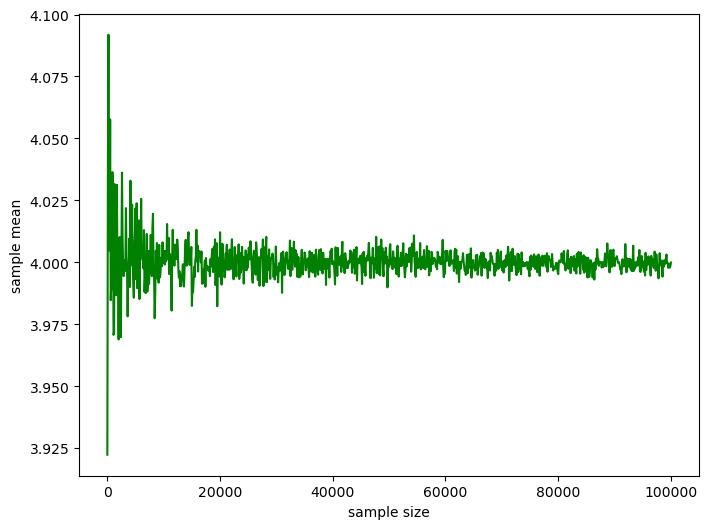

In [117]:
# 샘플 사이즈가 커지면 표본평균이 모평균에 수렴한다.
plt.figure(figsize=(8,6))
plt.plot(size_array,sample_mean_array_size,color='green')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

모집단과 표본집단의 관계 -> 샘플의 횟수 및 size 커질수록 모평균에 가까워진다.
중심극한정리 + 모집단의 분포가 무엇이든지간에!! 꼭 정규분포가 아니더라도 가능하다.

In [118]:
# 사용자함수(표본평균 계산)
def cal_sample_mean(size,n_trial):  #샘플사이즈와 횟수
    sample_mean_array=np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size=size).mean()
    return sample_mean_array

np.mean(cal_sample_mean(size=10, n_trial=10000))

4.001728724963021

상기 사용자 함수를 사용하여 샘플사이즈가 10, 20, 30이고 샘플갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하세요.

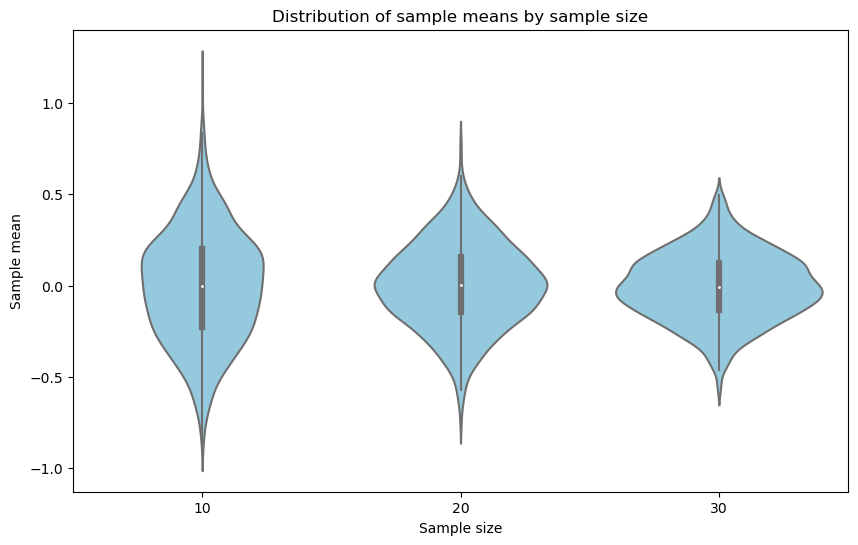

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 모집단 생성
population = norm(loc=0, scale=1)

def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size=size).mean()
    return sample_mean_array

# 샘플 크기와 샘플 갯수
sample_sizes = [10, 20, 30]
n_trials = 1000

# 샘플 평균 계산
sample_means = pd.DataFrame({
    'sample size': np.repeat(sample_sizes, n_trials),
    'sample mean': np.concatenate([
        cal_sample_mean(size=s, n_trial=n_trials) for s in sample_sizes
    ])
})

# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='sample size', y='sample mean', data=sample_means, color='skyblue')
plt.title('Distribution of sample means by sample size')
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.show()

np.concatenate는 NumPy에서 제공하는 배열을 합치는 함수입니다.

이 함수는 두 개 이상의 배열을 연결하여 하나의 배열로 만들어주는 역할을 합니다. 예를 들어, np.concatenate([a, b])와 같이 사용하면 a 배열과 b 배열을 연결하여 새로운 배열을 반환합니다.

np.concatenate 함수의 첫 번째 인수로는 합치고자 하는 배열들을 리스트 형태로 전달하며, 두 번째 인수로는 연결 방향을 지정하는 axis 매개변수를 전달할 수 있습니다. axis 매개변수를 지정하지 않으면, 디폴트로 axis=0이 적용되어 첫 번째 차원(행)을 따라 배열이 연결됩니다.

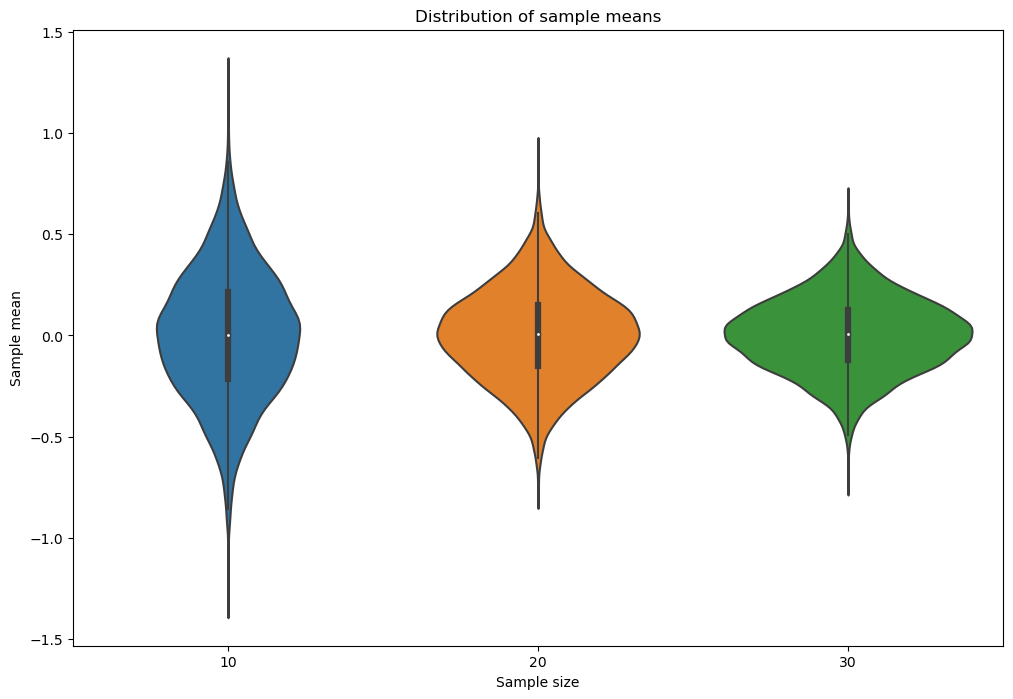

In [120]:
# 슬기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

population = norm(loc=0,scale=1)

def cal_sample_mean(size,n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size).mean()
    return sample_mean_array

size10 = 10
size20 = 20
size30 = 30
n_trial = 10000

sample_mean_array1 = cal_sample_mean(size10, n_trial)

df1 = pd.DataFrame({'sample_mean': sample_mean_array1})
df1['sample_size'] = size10
df1.head()

sample_mean_array2 = cal_sample_mean(size20, n_trial)

df2 = pd.DataFrame({'sample_mean': sample_mean_array2})
df2['sample_size'] = size20
df2.head()

sample_mean_array3 = cal_sample_mean(size30, n_trial)

df3 = pd.DataFrame({'sample_mean': sample_mean_array3})
df3['sample_size'] = size30
df3.head()

# 하나씩 그리기
# sns.violinplot(data=df1, x='sample_size', y='sample_mean')
# plt.xlabel('Sample Size')
# plt.ylabel('Sample Mean')
# plt.title('Distribution of Sample Means (n=10)')
# plt.show()

# 합쳐서 그리기
df = pd.concat([df1, df2, df3], axis=0)

plt.figure(figsize=(12,8))
sns.violinplot(x='sample_size', y='sample_mean', data=df)
plt.title('Distribution of sample means')
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.show()

4/12

In [121]:
# 정규분포의 확률밀도 계산

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.norm.pdf(loc=4, scale=0.8, x=4) # probability density function

0.49867785050179086

PDF는 확률 변수가 특정 값을 가질 확률 밀도를 나타내는 함수입니다. 즉, 어떤 값 x가 확률 변수에서 나올 확률을 나타냅니다. 확률 변수가 연속 변수일 경우, PDF는 확률 밀도 함수로 불립니다. 보통 f(x)로 나타내며, 아래와 같은 성질을 가집니다.

f(x)는 항상 0 이상의 값을 가집니다.
전체 적분 값이 1이 됩니다. ∫ f(x) dx = 1
CDF는 확률 변수가 특정 값보다 작거나 같을 확률을 나타내는 함수입니다. 이때, 작거나 같은 것은 누적확률을 의미하며, 적분을 통해 계산됩니다. 보통 F(x)로 나타내며, 아래와 같은 성질을 가집니다.

0 ≤ F(x) ≤ 1
x1 < x2 일 때, F(x1) ≤ F(x2)
CDF는 비감소 함수입니다. (즉, x1 < x2 일 때, F'(x1) ≤ F'(x2) 입니다.)
PDF와 CDF는 서로 밀접한 관계를 가지고 있습니다. CDF는 PDF를 적분한 결과이며, PDF는 CDF를 미분한 결과입니다. 따라서, PDF와 CDF는 둘 다 같은 분포를 나타내는 데 사용됩니다. PDF를 사용하여 연속 분포에서 확률을 계산하고, CDF를 사용하여 분포에서 특정 값을 갖는 변수의 확률을 계산할 수 있습니다.

여기서 x=4는 확률밀도함수를 구할 때 구하고자 하는 구간의 값을 나타냅니다. 따라서 x=4는 평균이 4이고 표준편차가 0.8인 정규분포에서 확률밀도함수를 구할 때, 구하고자 하는 구간의 값이 4라는 것을 의미합니다.

확률밀도함수는 확률분포에서 어떤 구간에 속할 확률을 나타내는 함수이므로, x=4의 확률밀도를 계산하면 평균이 4이고 표준편차가 0.8인 정규분포에서 값이 4일 확률밀도를 구할 수 있습니다.

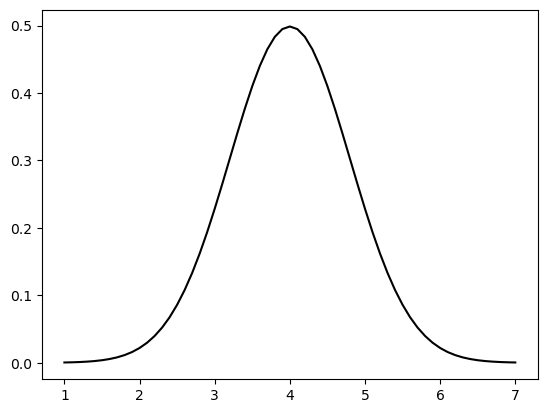

In [122]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='black')
plt.show()

In [123]:
# Q. 동일 확률밀도 함수에서 x=3일때의 확률을 구하세요.
norm_dist= stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

norm_dist = stats.norm(loc=4, scale=0.8)는 평균이 4이고 표준편차가 0.8인 정규분포를 나타내는 확률분포 객체를 생성하는 코드입니다.

norm_dist.pdf(x=3)는 위에서 생성한 norm_dist 확률분포 객체에서 확률밀도함수(probability density function, pdf)를 계산하는 메소드입니다.

여기서 x=3은 확률밀도함수를 계산할 때 계산하고자 하는 구간의 값을 나타냅니다. 따라서 x=3은 평균이 4이고 표준편차가 0.8인 정규분포에서 값을 3으로 가지는 지점의 확률밀도를 구하는 것을 의미합니다.

하지만 값 3은 정규분포에서 가능한 구간의 범위를 벗어나므로, 이는 실제로는 0에 매우 가까운 값(거의 0)이 됩니다. 따라서 norm_dist.pdf(x=3)은 매우 작은 값(거의 0)이 될 것입니다.

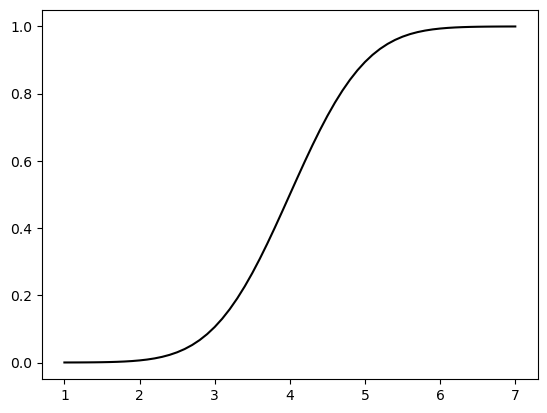

In [124]:
# 누적분포함수
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black') # cumulative distribution function
plt.show()

stats.norm.cdf는

SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다.

정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다.

loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다.

loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

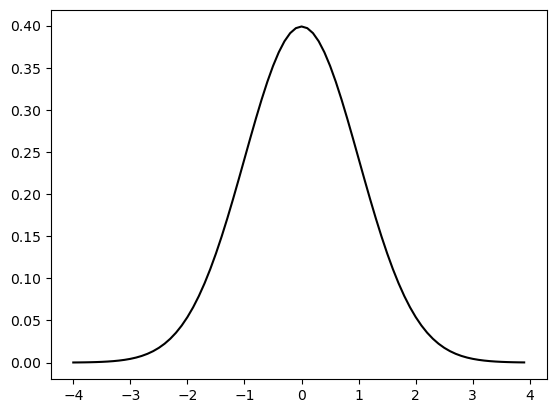

In [125]:
x_plot = np.arange(-4,4,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot, loc=0, scale=1), color='black') 

In [126]:
stats.norm.pdf(x=4)

0.00013383022576488537

여기서 x=0은 확률밀도함수를 계산할 때 계산하고자 하는 구간의 값을 나타냅니다. 따라서 x=0은 평균이 0이고 표준편차가 1인 표준정규분포에서 값을 0으로 가지는 지점의 확률밀도를 구하는 것을 의미합니다.

표준정규분포에서 값이 0인 지점의 확률밀도는 최대치를 갖습니다. 따라서 stats.norm.pdf(x=0)은 0을 중심으로 좌우대칭인 종 모양의 확률밀도함수에서 가장 큰 값을 갖게 됩니다. 이 값은 0.3989422804014327입니다.

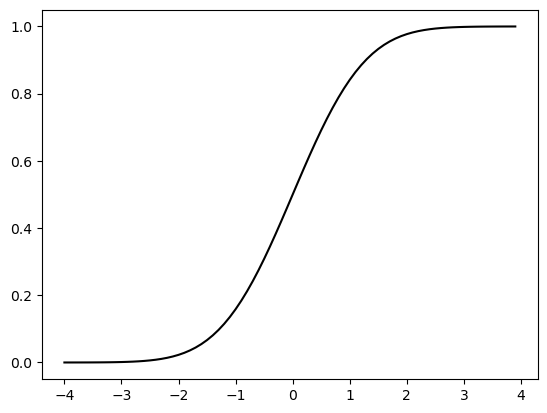

In [127]:
x_plot = np.arange(-4,4,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=0,scale=1),color='black')

In [128]:
# 하측확률
stats.norm.cdf(x=0)
# 0이 주어졌으니 0보다 작은 것들의 합을 뜻하는 것이 하측확률

0.5

In [129]:
# 평균이 5, 표준편차가 2인 정규분포에서 3이하의 확률 계산

stats.norm.cdf(x = 3, loc = 5, scale = 2)

0.15865525393145707

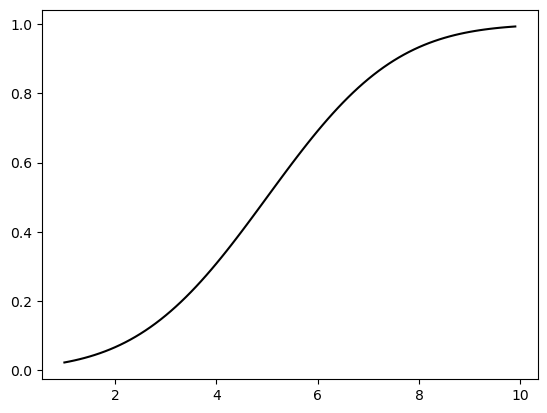

In [130]:
x_plot = np.arange(1,10,0.1)
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 5, scale = 2),color='black')

stats.norm.cdf() 함수는 주어진 분포에서 x 이하의 값을 취할 확률을 계산하는 함수입니다. 따라서, plt.plot() 함수를 이용하여 이 확률 값을 시각화하려면, x 값들의 범위를 지정하여 stats.norm.cdf() 함수를 계산해야 합니다. x_plot 범위 내의 값들에 대해 stats.norm.cdf()를 계산하여 그 값을 y축 값으로 사용하고, x_plot 범위 내의 값들에 대해서는 x축 값으로 사용합니다. 그래서 x_plot을 plt.plot() 함수의 첫번째 인자로 사용합니다.

In [131]:
# 확률밀도함수와 누적분포함수에서 대응되는 확률에 대해 알아봤습니다~

In [132]:
# 확률이 주어졌을 떄 x값 구하기

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [133]:
# 평균이 5이고 표준편차가 2인 표준정규분포에서 누적분포확률이 0.8이 되는 값?
from scipy.stats import norm
x = norm.ppf(0.8,loc=5,scale=2)
print(x)

6.683242467145829


In [134]:
# 평균 4, 표준편차 0.8 인 정규분포에서 확률이 0.5일때의 분위수 값을 계산하세요.

In [138]:
from scipy.stats import norm
x = norm.ppf(0.5,loc=4,scale=0.8)
print(x)


normal = stats.norm(loc=4,scale=0.8)
#normal.ppf(0.5)
normal.pdf(x=4)

4.0


0.49867785050179086

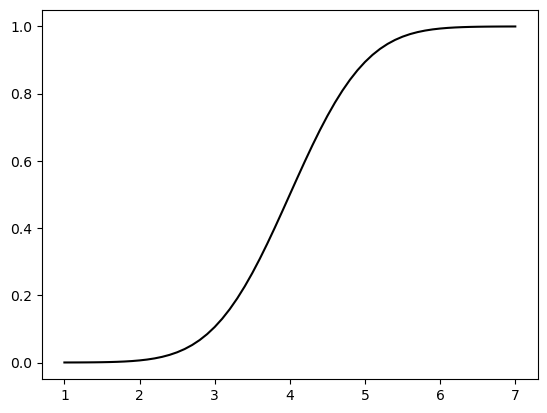

In [136]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 4, scale = 0.8),color='black')

자유도
추정 - 값을 추정하거나 구간을 추정

가설과 검정

#### 자유도
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

자유도에서 -1을 하는 이유는 표본 통계량의 분포를 계산할 때, 표본의 크기에 따라서 확률 분포의 모양이 달라지기 때문입니다.

보통, 우리는 모집단의 분포가 정규 분포를 따른다고 가정하고, 이 가정에서 표본의 분포를 계산합니다. 이때, 표본의 크기가 작을수록, 표본 평균이 모집단 평균에 대한 추정치로서 더 부정확해지며, 분산이 더 커집니다.

따라서, 정규 분포에서 표본의 분포를 계산할 때, 표본 크기가 작아질수록 분포의 모양이 더 평평해지고, 분산이 더 커지게 됩니다. 이때, 자유도는 표본 크기와 관련이 있으며, 자유도가 작아질수록 분산이 더 커지게 됩니다.

하지만, 표본에서 추정한 분산과 모집단의 분산을 비교할 때, 표본에서 추정한 분산이 모집단의 분산보다 작아질 가능성이 있습니다. 이때, 분모에 있는 n 대신에 (n-1)을 사용하면 보다 정확한 결과를 얻을 수 있습니다. 이를 보정된 표준 편차 또는 자유도 보정이라고 합니다.

따라서, 표본에서 추정한 분산과 표준 편차를 계산할 때, 자유도에서 -1을 하는 것은 보정된 표준 편차를 계산하기 위해 사용됩니다. 이렇게 보정된 표준 편차를 사용하면, 통계적으로 보다 정확한 결과를 얻을 수 있습니다.

20개 중에서 하나빼고 자유로울 수 있다. 그 하나는 평균임!! 그냥 이렇게 생각하자.
샘플들은 바꿀 수 있지만 평균은 계산돼서 나오는 것이므로 우리가 어떻게 할 수 없다.

평균을 고정한다의 원리
평균이 5라고 가정했을 때,
(5,5,5) (1,5,9) (2,6,7)
마지막 숫자를 고려하게 됨. -> 평균이 5가 되어야하므로 우리가 고를 수 있는 건 두 개 밖에 없음.


n개가 작을 때에는 제대로 활용할 수 없으므로 그럴 때에는 t분포를 사용 (보통 30개 기준)

t분포란
- 일반적으로 여러 실험을 해보면 데이터가 평균 근처에 많이 분포하고 평균에서 멀어질수록 적게 분포하는 형태를 띠는 정규분포인 경우가 많다. 그런데 정규분포는 표본의 수가 적으면 신뢰도가 낮아진다.
- 신뢰도를 높이기 위해 표본을 많이 뽑으면 되지만 현실적으로 시간과 비용의 제약으로 한계가 있으며,
이에대한 대응책으로 정규분표보다 한 단계 예측범위가 넓은 분포를 사용하는데 그것이 t분포이다.
- t분포는 정규분포의 표준정규분포처럼 표준이 되는 그래프는 없으며, 대신 표본의 수에 따라서 그래프의 모양이 변한다. 그리고 표본의 수가 많아질수록 점점 표준정규분포와 비슷해지고 표본의 수가 적어질수록
그래프는 점점 옆으로 퍼진다.
- t분포는 확률을 구하는 경우보다는 신뢰구간 혹은 가설 검정에 주로 사용하는데, 특히 표본의 수가 30개 미만일 때 정규분포 대신 예측범위가 넓은 t분포를 사용한다. 표본의 수가 30개 이상이면 정규분포와 비슷해지기 때문에 그 때에는 정규분포를 사용하는 것이 바람직하다.
- t분포로 신뢰구간을 추정하고 가설검정을 할 때 t값을 알아야하는데 t값은 x축 좌표이다.
- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.

t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)과 비교하여 검정을 수행합니다. 
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.

이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.

#### 과제1 두 가지 신약의 효과를 비교하기 위해 t검정을 수행하세요

- 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
- x1=[3,4,5,6,7,8,9,10,11,12], x2= [2,3,4,5,6,7,8,9,10,11]
- 유의수준 0.05

- 귀무가설: 두 신약의 효과는 차이가 없다.(두 집단의 평균값의 차이는 0이다.)

- 대립가설: 두 신약의 효과는 차이가 있다.(두 집단의 평균값의 차이는 0이 아니다.)

In [144]:
import numpy as np
from scipy.stats import t

# X1과 X2의 데이터를 입력합니다.
x1 = [3,4,5,6,7,8,9,10,11,12]
x2 = [2,3,4,5,6,7,8,9,10,11]

# 각 집단의 평균값과 표준편차를 계산합니다.
mean1 = np.mean(x1) #x1 평균값
mean2 = np.mean(x2) #x2 평균값
std1 = np.std(x1) #x1 표준편차
std2 = np.std(x2) #x2 표준편차
st1 = std1 / np.sqrt(len(x1)) #표준오차
st2 = std2 / np.sqrt(len(x2))

# t-검정을 수행하기 위한 변수를 계산합니다.
t_score= (mean1-mean2) /(st1**2 + st2**2)**0.5

# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.
alpha =0.05
df = len(x1)-1

t_crit1 = t.ppf(alpha/2, df)
t_crit2 = t.ppf(1-alpha/2, df)

p_value = t.sf(abs(t_score),df)*2

# 검정 결과를 출력합니다.
print(f"검정통계량: {t_score}")
print(f"유의확률: {p_value}")
print(f'임계값: {t_crit1}, {t_crit2}')

# 검정통계량이 임계값 사이에 있으므로 귀무가설을 기각할 수 없음(귀무가설 채택)
# 유의확률이 유의수준보다 크므로 귀무가설을 기각할 수 없음

# 만약 p(유의확률)값이 유의수준(0.05)보다 작으면, 귀무가설을 기각하고 대립가설을 채택할 수 있음

검정통계량: 0.778498944161523
유의확률: 0.4562539242596302
임계값: -2.262157162740992, 2.2621571627409915


In [1]:
import numpy as np
from scipy.stats import t

# X1과 X2의 데이터를 입력합니다.
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 각 집단의 평균값과 표준편차를 계산합니다.
mean_X1 = np.mean(X1)
mean_X2 = np.mean(X2)
std_X1 = np.std(X1, ddof=1)
std_X2 = np.std(X2, ddof=1)

# t-검정을 수행하기 위한 변수를 계산합니다.
# pooled standard deviation (합동 표준편차)는 t-검정에서 두 집단의 표준편차를 통합하는 방법 중 하나입니다.
# 두 집단의 표본 표준편차가 서로 비슷하다는 가정 하에, 두 집단의 표준편차를 통합하여 하나의 표준편차로 계산
N1 = len(X1)
N2 = len(X2)
dof = N1 + N2 - 2
pooled_std = np.sqrt(((N1 - 1) * std_X1 **2 + (N2 - 1) * std_X2 ** 2) / dof)
t_statistic = (mean_X1 - mean_X2) / (pooled_std * np.sqrt(1 / N1 + 1 / N2))

# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.
alpha = 0.05
t_critical = t.ppf (1 - alpha / 2, dof)

# 검정 결과를 출력합니다.
if abs(t_statistic) > t_critical:
    print("검정 결과 : 두 집단의 평균값은 서로 다릅니다.")
else:
    print("검정 결과 : 두 집단의 평균값은 서로 같습니다.")

검정 결과 : 두 집단의 평균값은 서로 같습니다.


t 검정에서 사용되는 합동표준편차(pooled standard deviation)는 두 개의 독립적인 표본의 표준편차를 종합하여 하나의 표준편차로 추정하는 방법입니다. 이 방법은 두 집단이 정규분포를 따르고, 분산이 동일한 경우에 사용됩니다.

합동표준편차는 각각의 표본의 자유도(degree of freedom)를 고려하여 가중평균을 계산합니다. 자유도는 각각의 표본 크기에서 1을 뺀 값입니다.

합동표준편차를 계산하는 공식은 다음과 같습니다.

s_p = sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n2-2))

여기서, n1과 n2는 각각의 표본 크기, s1과 s2는 각각의 표본의 표준편차를 나타냅니다. s_p는 합동표준편차를 나타냅니다.

t 검정에서는 이 합동표준편차를 이용하여 검정통계량을 계산합니다. 계산식은 다음과 같습니다.

t = (x1 - x2) / (s_p * sqrt(1/n1 + 1/n2))

여기서, x1과 x2는 각각의 표본의 평균을 나타냅니다. t는 검정통계량을 나타냅니다.

따라서, t 검정에서는 두 집단의 분산이 동일하다는 가정을 만족하는 경우에만 합동표준편차를 사용하여 검정을 수행할 수 있습니다. 만약 두 집단의 분산이 서로 다르다면, Welch의 t 검정을 사용하여 검정을 수행해야 합니다.

두 집단에 대한 t-검정을 수행하기 위해 필요한 변수는 다음과 같습니다.

독립 변수: 두 집단을 구분하기 위한 변수입니다. 예를 들어, 남성과 여성, A 그룹과 B 그룹 등이 될 수 있습니다.

종속 변수: 비교하려는 변수입니다. 두 집단의 평균이 서로 다른지, 분산이 서로 다른지 등을 검정할 수 있습니다.

가설: 귀무 가설(H0)과 대립 가설(H1)을 설정합니다. 귀무 가설은 두 집단 간에 차이가 없다는 것을 말하며, 대립 가설은 두 집단 간에 차이가 있다는 것을 말합니다.

유의 수준: 귀무 가설을 기각할 기준이 되는 확률 값입니다. 일반적으로 0.05 혹은 0.01이 사용됩니다.

검정 통계량: 두 집단 간의 차이를 계산하는 통계량으로, 일반적으로 t-값을 사용합니다.

자유도: 검정 통계량에서 사용되는 자유도입니다. 자유도는 표본 크기에 따라 결정됩니다.

이 변수들을 사용하여 두 집단에 대한 t-검정을 수행할 수 있습니다. 이를 통해 두 집단 간에 차이가 있는지, 어떤 변수가 차이를 유발하는지 등을 확인할 수 있습니다.

#### 과제2 
위 사례에서 두 가지 신약의 효과를 비교하기 위해 p값으로 검정을 수행하세요

In [153]:
# 표준오차 에서 **0.5 = 루트 씌우는ㄴ거
 
# t-value는 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값으로 계산
sample_data=[2.3,3.5,1.8,4.1,2.7]
sample_mean=sum(sample_data)/len(sample_data) # 표본 평균계산
sample_std=stats.tstd(sample_data) # 표본 표준편차 계싼
pop_mean=3.0 # 모집단 평균 가정
t_value=(sample_mean-pop_mean)/(sample_std/len(sample_data)**0.5)
t_value

-0.2907009498669058

In [154]:
# t값의 표본분포
from scipy import stats
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4)/sample_se
    
t_value_array[9990:]

array([-0.33592303,  0.35653238, -0.37906467,  1.39560145, -0.64962735,
        0.14359649,  0.81927618,  0.51107726,  1.6626489 ,  0.34027206])

<AxesSubplot:ylabel='Density'>

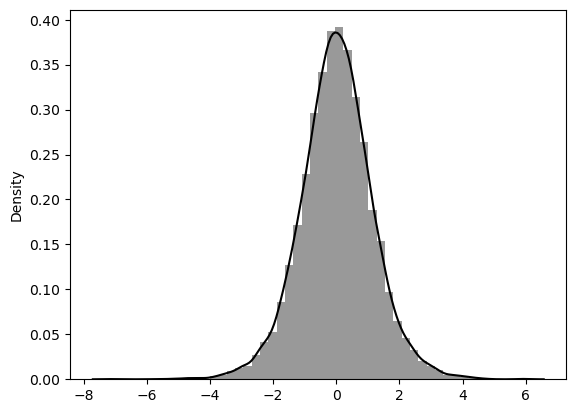

In [155]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(t_value_array,color='black')

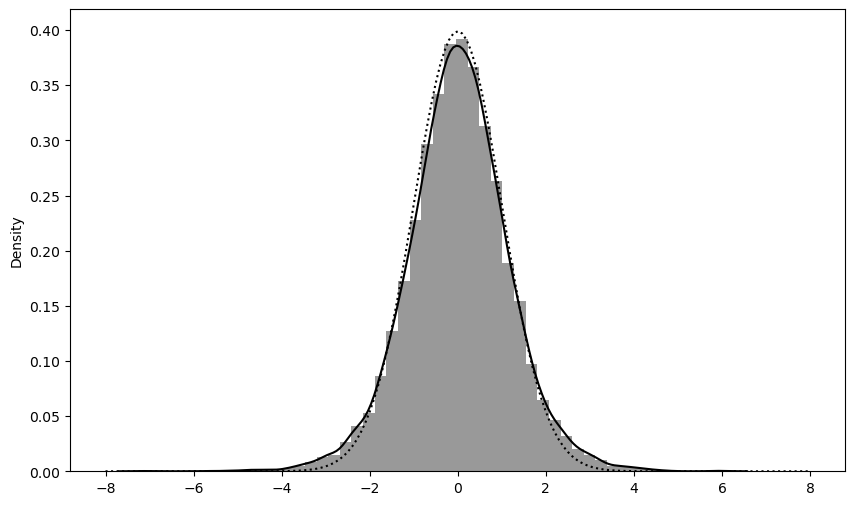

In [81]:
plt.figure(figsize=(10,6))
sns.distplot(t_value_array,color='black')
x = np.arange(-8,8.1,0.1)
plt.plot(x,stats.norm.pdf(x=x), # (x=x, loc=0, scale=1)과 똑같음, 생략하면 표준정규분포랑 똑같다
        color='black', linestyle='dotted')

# t분포가 양쪽 끝이 좀 더 두껍게 되어있다. (점점 옆으로 퍼진다.!)
# t분포는 기본적으로 표준정규분포보다 좀 더 옆으로 퍼져있다.

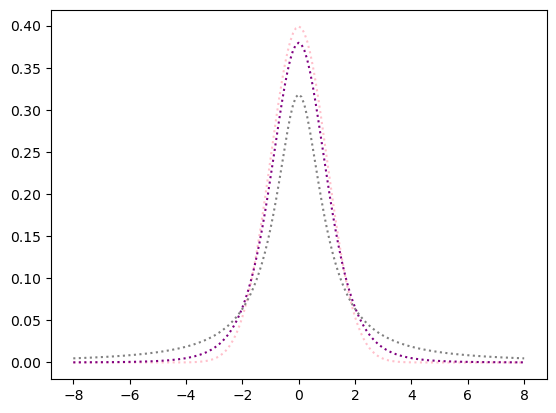

In [82]:
# 그걸 좀 더 자세히 보자!
# 자유도 n이 커짐에 따라 표준정규분포N(0,1)에 수렴
plt.plot(x,stats.norm.pdf(x=x),
        color='pink', linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x, df=5),
        color='purple', linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=1),
        color='gray', linestyle='dotted')

#샘플이 30개 이상이면 거의 비슷

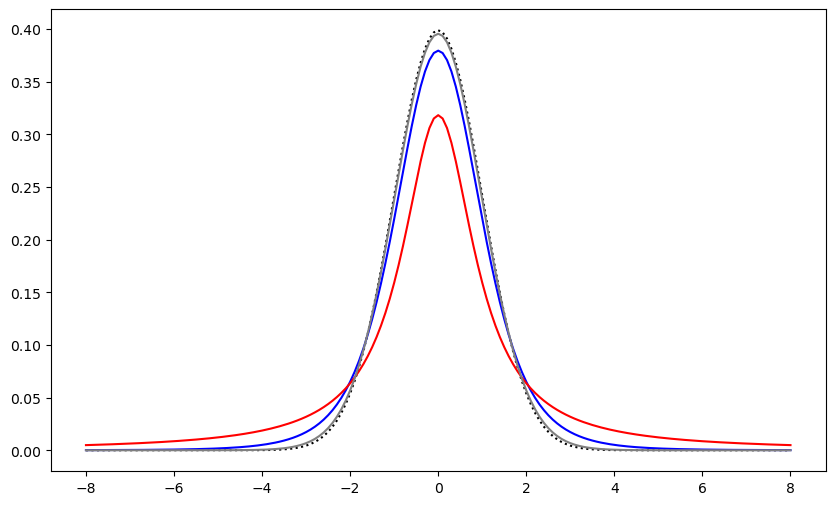

In [83]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴
plt.figure(figsize=(10,6))
plt.plot(x,stats.norm.pdf(x=x),
        color='black',linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=5),
        color='blue')
plt.plot(x,stats.t.pdf(x=x,df=1),
        color='red')
plt.plot(x,stats.t.pdf(x=x,df=30),
        color='gray')
plt.show()


과제1_0412.
pdf, cdf, ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 그 결과를 값과 그래프(확률밀도함수, 누적분포함수)로 출력하세요

과제2_0412.
t분포의 자유도를 5개로 조정하면서 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지를 확인할 수 있는 그래프를 출력하세요.

#### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법(평균이 75다.)
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용.(구간추정이 좀 더 정확하다.)
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰수준(신뢰계수)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐(99%가 더 맞추기 힘드니까 신뢰구간 폭이 더 크다)
- 신뢰한계 : 신뢰구간의 하한값과 상한값의 사이
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
 - 샘플수가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰수준이 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐

지피티) 신뢰구간을 구하는 식인 (표본평균 - 모평균) / 표준오차에 대해서 자세하게 설명해줘

신뢰구간을 구하는 식 중 하나는 (표본평균 - 모평균) / 표준오차 입니다. 이 식은 표본 평균과 모평균의 차이를 표준 오차로 나누어 구한 값을 이용하여 신뢰구간을 구하는 방법입니다.

표본 평균은 모집단에서 무작위로 추출한 표본의 평균을 의미하고, 모평균은 전체 모집단의 평균을 의미합니다. 따라서, (표본평균 - 모평균)은 표본이 모집단에서 무작위로 추출되었을 때, 표본 평균이 모평균과 얼마나 다른지를 나타내는 값입니다.

표준 오차는 표본의 분산 또는 표준편차를 이용하여 구할 수 있는 값으로, 표본의 분산 또는 표준편차가 작을수록 표본 평균이 모평균과 가까워지므로, 표준 오차가 작을수록 신뢰구간이 좁아집니다.

이 식에서는 (표본평균 - 모평균) 값을 표준 오차로 나누어주어서, 이 값을 이용하여 t-분포 또는 z-분포의 값을 구하게 됩니다. t-분포 또는 z-분포의 값은 신뢰수준(confidence level)에 따라 달라지며, 보통 95%나 99% 신뢰수준을 사용합니다.

예를 들어, 95% 신뢰수준을 가지고 있다면, t-분포 또는 z-분포에서 해당 신뢰수준에 해당하는 값을 찾은 후, 이 값을 곱하여 신뢰구간의 폭을 계산합니다. 이후, 표본 평균에서 더하거나 빼면, 최종적인 신뢰구간을 얻을 수 있습니다.

따라서, (표본평균 - 모평균) / 표준오차는 표본 평균과 모평균의 차이를 표준 오차로 나누어서, 해당 값이 t-분포 또는 z-분포의 어디에 위치하는지를 파악하여, 최종적인 신뢰구간을 구하는데 활용됩니다.







예를 들어, 100명의 학생들의 키를 측정하여 표본평균을 계산하였습니다. 이 때, 표본의 크기는 100이며, 표본평균은 170cm입니다. 이러한 데이터를 바탕으로 모집단의 평균을 추정하고자 합니다. 이 때, 신뢰구간을 이용하여 추정값의 신뢰도를 평가할 수 있습니다.

먼저, 신뢰수준(confidence level)을 설정합니다. 신뢰수준은 추정값이 구간 내에 존재할 확률로, 일반적으로 95%나 99%로 설정됩니다. 이번 예시에서는 신뢰수준을 95%로 설정하겠습니다.

다음으로, 표본의 크기와 분산을 이용하여 표준오차(standard error)를 계산합니다. 표준오차는 표본평균과 모집단 평균의 차이를 추정하는 데 사용되는 지표입니다. 표준오차를 계산하기 위해서는 표본평균의 표준편차(standard deviation)와 표본의 크기가 필요합니다. 이번 예시에서는 표본의 표준편차가 5cm, 표본의 크기가 100명이므로, 표준오차는 다음과 같이 계산됩니다.

표준오차 = 5 / sqrt(100) = 0.5

마지막으로, 추정값과 신뢰수준, 표준오차를 이용하여 신뢰구간을 계산합니다. 이번 예시에서는 95%의 신뢰수준을 가지고 있으므로, 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = 추정값 ± (신뢰계수 * 표준오차)
= 170 ± (1.96 * 0.5)
= (169.02, 170.98)

즉, 95%의 신뢰수준으로 모집단의 평균을 추정할 때, 평균은 약 169.02cm부터 170.98cm까지의 범위 내에 존재할 것으로 예상됩니다.

#### z분포와 t분포에서 신뢰구간 계산 방법의 차이

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. 하지만, z분포는 모집단의 표준편차를 알고 있을 때, t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다.

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준편차는 표본의 분산의 제곱근입니다.
n은 표본의 크기입니다.
반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
t분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 모르고 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준오차는 표본의 표준편차를 이용해 계산됩니다.
즉, t분포에서는 모집단의 분산을 알지 못하기 때문에, 표본의 분산을 이용하여 표준편차를 구합니다.

신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우

만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우

만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [6]:
# 모집단의 표준편차를 알고있는 경우

import numpy as np
from scipy.stats import norm

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std=0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포) 에 해당하는 z-score(표준편차 단위의 값)을 계산
z_val = norm.ppf((1+conf_level)/2)

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))
z_val

표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


1.959963984540054

In [87]:
from scipy.stats import norm

# 정규분포에서 95%의 구간을 구하기 위해 z-score를 계산합니다.
z=norm.ppf(0.975)

#z-score출력
print(z)

1.959963984540054


In [3]:
# 모집단의 표준편차를 모르는 경우

import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data= np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n= len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

#자유도
df = n-1

# t값 계산
#t-분포에서 어떤 확률값 (누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산 
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

# 결과 출력

print("표본 평균: {:.2f}".format (mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:2f}".format(conf_int[0], conf_int[1]))
t_val

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.492393


2.2621571627409915

In [91]:
from scipy.stats import norm

# t분포에서 95%의 구간을 구하기 위해 t-score를 계산합니다.
t_score=t.ppf(0.975,9) #t.ppf(구하고자 하는 분위수,자유도)

#t-score출력
print(t_score)

2.2621571627409915


In [14]:
import pandas as pd
df = pd.read_csv('./dataset/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [15]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [16]:
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [17]:
# 표준오차 구하기
sigma = np.std(fish,ddof=1) # 표본표준편차
se = sigma/np.sqrt(len(fish)) # 표준오차 se
round(se,2)


0.26

In [18]:
df = len(fish)-1
df

9

In [19]:
# 신뢰구간
from scipy import stats

interval = stats.t.interval(0.95,df=df,loc=mu,scale=se) #이건 인터벌 함수 #df는 자유도
interval

(3.597010056835825, 4.777068592173221)

표준오차를 사용하여 신뢰구간을 추정하면, 표본의 크기나 모집단의 분산과 무관하게 추정된 신뢰구간의 정확성을 보장할 수 있습니다. 이러한 이유로, 표준편차 대신 표준오차를 사용하여 표본평균의 신뢰구간을 추정하는 것이 일반적입니다.

In [20]:
# 표준편차를 10배로 늘려서 신뢰구간 계산(확대됨)
se2=sigma*10/np.sqrt(len(fish))
stats.t.interval(0.95, df=df, loc=mu, scale=se2)


(-1.7132533521824618, 10.087332001191509)

In [21]:
# 샘플사이즈를 10배로 늘려서 신뢰구간 계산

df2=(len(fish)*10)-1 
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(0.95,df=df2,loc=mu, scale=se3)


(4.0233803082774395, 4.350698340731607)

In [22]:
# 신뢰수준 95% vs 99%

df2=(len(fish)*10)-1 
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(0.95,df=df2,loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [24]:
df2=(len(fish)*10)-1 
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(0.99,df=df2,loc=mu, scale=se3)
# 신뢰구간이 넓어짐

(3.9704123408076932, 4.403666308201353)

In [23]:
stats.t.interval(0.99,df=df,loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

과제3
크기가 10인 표본데이터를 생성하고 평균과 표준편차를 구하세요.
신뢰수준을 95%로 설정하고 자유도를 계산하세요.
신뢰구간을 계산하고 결과를 출력하세요.

과제4_0412.
어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

- 표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 표본의 크기를 무작위로 100으로 확대

0.10798193302637613
0.022750131948179195
5.5049727401437485


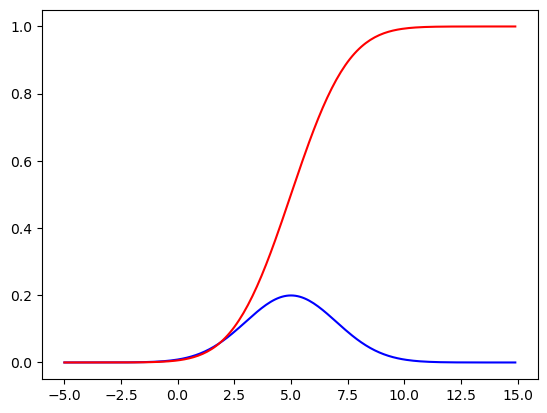

In [25]:
# 과제1
# pdf, cdf, ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 
# 그 결과를 값과 그래프(확률밀도함수, 누적분포함수)로 출력하세요.
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


x_plot=np.arange(-5,15,0.1)

# x=4일 때 확률 계산
norm_dist = stats.norm(loc=5,scale=0.5)
print(norm_dist.pdf(x=4))

# 평균이 5, 표준편차가 0.5인 정규분포에서 4 이하의 확률 계산
a= stats.norm.cdf(x=4, loc=5, scale=0.5)
print(a)

# 평균이 5이고 표준편차가 0.5인 표준정규분포에서 확률이 0.6이 되는 분위수 계산
b = norm.ppf(0.8,loc=5,scale=0.6)
print(b)

stats.norm.pdf(loc=5, scale=0.5,x=3)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=5,scale=2),color='blue')
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=5,scale=2),color='red')
plt.show()

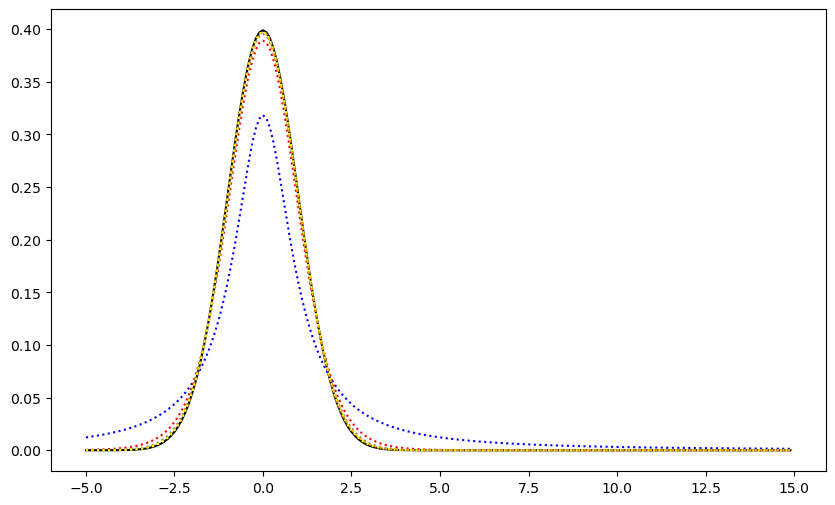

In [30]:
# 과제2
# t분포의 자유도를 5개로 조정하면서 
# 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지를 확인할 수 있는 그래프를 출력하세요.

plt.figure(figsize=(10,6))
plt.plot(x_plot,stats.norm.pdf(x=x_plot),
        color='black')
plt.plot(x_plot,stats.t.pdf(x=x_plot,df=1),
        color='blue',linestyle='dotted')
plt.plot(x_plot,stats.t.pdf(x=x_plot,df=10),
        color='red',linestyle='dotted')
plt.plot(x_plot,stats.t.pdf(x=x_plot,df=30),
        color='gray',linestyle='dotted')
plt.plot(x_plot,stats.t.pdf(x=x_plot,df=50),
        color='orange',linestyle='dotted')
plt.plot(x_plot,stats.t.pdf(x=x_plot,df=80),
        color='yellow',linestyle='dotted')
plt.show()

In [22]:
# 과제3
# 크기가 10인 표본데이터를 생성하고 평균과 표준편차를 구하세요. 
# 신뢰수준을 95%로 설정하고 자유도를 계산하세요. 신뢰구간을 계산하고 결과를 출력하세요.

a=np.arange(1,11)
a1=np.array(a)
mu=a1.mean()
sigma=np.std(a1,ddof=1)
df= len(a1)-1
se=sigma/np.sqrt(len(a1))
print(mu)
print(sigma)

stats.t.interval(0.95, df=df, loc=mu, scale=se)

5.5
3.0276503540974917


(3.3341494103866087, 7.665850589613392)

In [33]:
import numpy as np
from scipy.stats import norm
from scipy import stats

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.30 ~ 1.68


In [17]:
# 과제4
# 어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정. 
# 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 
# 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

# 표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
# 표본의 크기를 무작위로 100배 확대

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

list_a=[49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
list_b=np.random.randint(30,70,100)

a_arr=np.array(list_a)
b_arr=np.array(list_b)

a_mu=a_arr.mean() # 평균
a_sigma=np.std(a_arr,ddof=1) # 표준편차
a_df=len(a_arr)-1 # 자유도(보정된 표준 편차를 계산)
a_se=a_sigma/np.sqrt(len(a_arr)) # 표준오차
print(stats.t.interval(0.95, df=a_df, loc=a_mu, scale=a_se)) # 신뢰구간 계산

b_mu=b_arr.mean()
b_sigma=np.std(b_arr,ddof=1)
b_df=len(b_arr)-1
b_se=b_sigma/np.sqrt(len(b_arr))
print(stats.t.interval(0.95, df=b_df, loc=b_mu, scale=b_se))

(49.78760654276464, 50.49239345723536)
(47.77288174405542, 52.08711825594458)


In [18]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [19]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)*100

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*100)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 50.11 ~ 50.17


In [ ]:
# 샘플수가 커지면 신뢰구간은 좁아지고, 95-> 99 신뢰구간은 커진다.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))